In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
data_selected = pd.read_csv('/Users/sarahsha/Downloads/preprocessed_crimes_data.csv')

In [2]:
data_selected.head(5)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232


In [3]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'},inplace = True)

In [4]:
#non_criminal_group=[20,21,22]
#narcotics = [19,25]
#public_peace_violation = [28,29]
#other_offense = [26,30]
#data_selected['Crime_Type'] = data_selected['Crime_Type'].replace(non_criminal_group, 20)
#data_selected['Crime_Type'] = data_selected['Crime_Type'].replace(narcotics,19)
#data_selected['Crime_Type'] = data_selected['Crime_Type'].replace(public_peace_violation,29)
#data_selected['Crime_Type'] = data_selected['Crime_Type'].replace(other_offense,26)
#drop the outliers domestic violence
#data_new = data_selected[data_selected['Crime_Type'] != 10]

In [5]:
data_selected

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
...,...,...,...,...,...,...,...
7926424,2012451,2020.0,-87.698104,41.772671,17,3,502
7926425,1502240,2020.0,-87.614211,41.724546,160,34,1
7926426,1877568,2020.0,-87.709461,41.870921,17,2,211
7926427,2050563,2020.0,-87.688929,41.995927,189,18,152


In [6]:
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

In [7]:
# scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary (validation and testing) sets.
# X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [9]:
from tensorflow.keras.utils import to_categorical
num_classes=len(y_train.unique())
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

2023-11-29 14:01:44.847236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))
#from tensorflow.keras.optimizers import Adam
# Compile the model
#optimizer = Adam(learning_rate=10) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_val,y_val_onehot))

# Evaluate the model on the test set


2023-11-29 14:01:48.673601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
173391/173391 [==============================] - 114s 656us/step - loss: 1.0319 - accuracy: 0.6786 - val_loss: 0.7835 - val_accuracy: 0.7340
Epoch 2/5
173391/173391 [==============================] - 115s 665us/step - loss: 0.7083 - accuracy: 0.7659 - val_loss: 0.6508 - val_accuracy: 0.7893
Epoch 3/5
173391/173391 [==============================] - 114s 658us/step - loss: 0.6250 - accuracy: 0.7925 - val_loss: 0.5969 - val_accuracy: 0.8041
Epoch 4/5
173391/173391 [==============================] - 115s 665us/step - loss: 0.5784 - accuracy: 0.8066 - val_loss: 0.5628 - val_accuracy: 0.8141
Epoch 5/5
173391/173391 [==============================] - 118s 678us/step - loss: 0.5530 - accuracy: 0.8133 - val_loss: 0.5462 - val_accuracy: 0.8137


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_onehot)

24523/24523 [==============================] - 11s 443us/step - loss: 0.5473 - accuracy: 0.8130
Test Accuracy: 81.30%


In [16]:
# Predict the probabilities of instances belonging to each class.
y_pred_probabilities = model.predict(X_test)
# Make the final Prediction
y_pred = np.argmax(y_pred_probabilities,axis=-1)

24523/24523 [==============================] - 10s 392us/step


In [17]:
# Evaluate the performance
from sklearn.metrics import precision_score, recall_score, f1_score
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'One Hidden Layer ANN Precision: {Precision:.2f}' )
print(f'One Hidden Layer ANN Recall: {Recall:.2f}' )
print(f'One Hidden Layer ANN F1_score: {F1_score:.2f}' )

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 81.30%
One Hidden Layer ANN Precision: 0.79
One Hidden Layer ANN Recall: 0.81
One Hidden Layer ANN F1_score: 0.79


In [13]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [19]:
y_pred_probabilities = model.predict(X_test)

24523/24523 [==============================] - 10s 403us/step


In [20]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = np.argmax(y_pred_probabilities,axis=-1)
report = classification_report(y_test, y_pred)
print(f'One Hidden Layer Classification Report:\n'
      f'{report}')

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


One Hidden Layer Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.17      1281
           1       0.46      0.09      0.15     51657
           2       0.71      0.95      0.82    143368
           3       0.87      0.93      0.90     42516
           4       0.71      0.23      0.35       103
           5       0.63      0.62      0.62      2775
           6       0.88      0.93      0.90     89570
           7       0.69      0.37      0.48       752
           8       0.70      0.63      0.66     21757
           9       0.69      0.62      0.66     34693
          11       0.77      0.61      0.68      1504
          12       0.37      0.17      0.23      1255
          13       0.00      0.00      0.00        10
          14       0.79      0.38      0.51      1860
          15       0.00      0.00      0.00       451
          16       0.00      0.00      0.00       719
          17       0.49      0.33      0.

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_score = f1_score(y_test, y_pred, average='weighted')

/Users/sarahsha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(f'One Hidden Layer ANN Precision: {Precision:.2f}' )
print(f'One Hidden Layer ANN Recall: {Recall:.2f}' )
print(f'One Hidden Layer ANN F1_score: {F1_score:.2f}' )

One Hidden Layer ANN Precision: 0.79
One Hidden Layer ANN Recall: 0.81
One Hidden Layer ANN F1_score: 0.79


In [23]:
crime_type_mapping = {
    0: 'ARSON',
    1: 'ASSAULT',
    2: 'BATTERY',
    3: 'BURGLARY',
    4: 'CONCEALED CARRY LICENSE VIOLATION',
    5: 'CRIM SEXUAL ASSAULT',
    6: 'CRIMINAL DAMAGE',
    7: 'CRIMINAL SEXUAL ASSAULT',
    8: 'CRIMINAL TRESPASS',
    9: 'DECEPTIVE PRACTICE',
    10: 'DOMESTIC VIOLENCE',
    11: 'GAMBLING',
    12: 'HOMICIDE',
    13: 'HUMAN TRAFFICKING',
    14: 'INTERFERENCE WITH PUBLIC OFFICER',
    15: 'INTIMIDATION',
    16: 'KIDNAPPING',
    17: 'LIQUOR LAW VIOLATION',
    18: 'MOTOR VEHICLE THEFT',
    19: 'NARCOTICS',
    20: 'NON - CRIMINAL',
    21: 'NON-CRIMINAL',
    22: 'NON-CRIMINAL (SUBJECT SPECIFIED)',
    23: 'OBSCENITY',
    24: 'OFFENSE INVOLVING CHILDREN',
    25: 'OTHER NARCOTIC VIOLATION',
    26: 'OTHER OFFENSE',
    27: 'PROSTITUTION',
    28: 'PUBLIC INDECENCY',
    29: 'PUBLIC PEACE VIOLATION',
    30: 'RITUALISM',
    31: 'ROBBERY',
    32: 'SEX OFFENSE',
    33: 'STALKING',
    34: 'THEFT',
    35: 'WEAPONS VIOLATION'
}

In [24]:
y_test_pred = model.predict(X_test)

24523/24523 [==============================] - 9s 376us/step


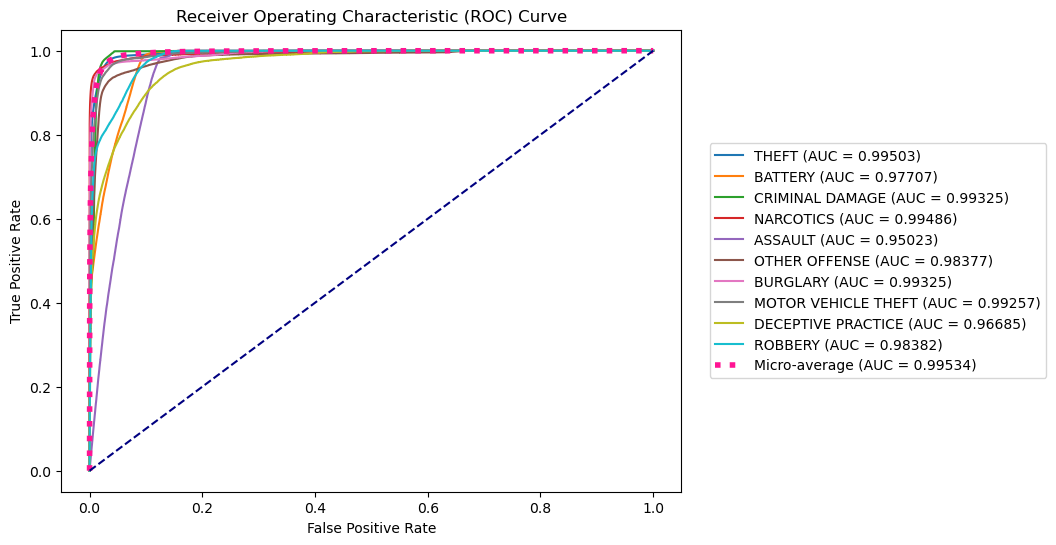

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


n_classes = y_test_onehot.shape[1] if len(y_test_onehot.shape) > 1 else 1

class_counts = np.sum(y_test_onehot, axis=0)
top_10_classes = np.argsort(class_counts)[-10:][::-1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if i != 10:
        fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_test_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(),  y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Plot individual class ROC curves
for i in top_10_classes:
    if i != 10:
        plt.plot(fpr[i], tpr[i], label=f'{crime_type_mapping[i]} (AUC = {roc_auc[i]:.5f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))
plt.show()

# Calculate the overall ROC AUC score
#macro_roc_auc = roc_auc_score(y_test_onehot, y_test_pred, average='macro')
#print(f'Macro-average ROC AUC: {macro_roc_auc:.2f}')

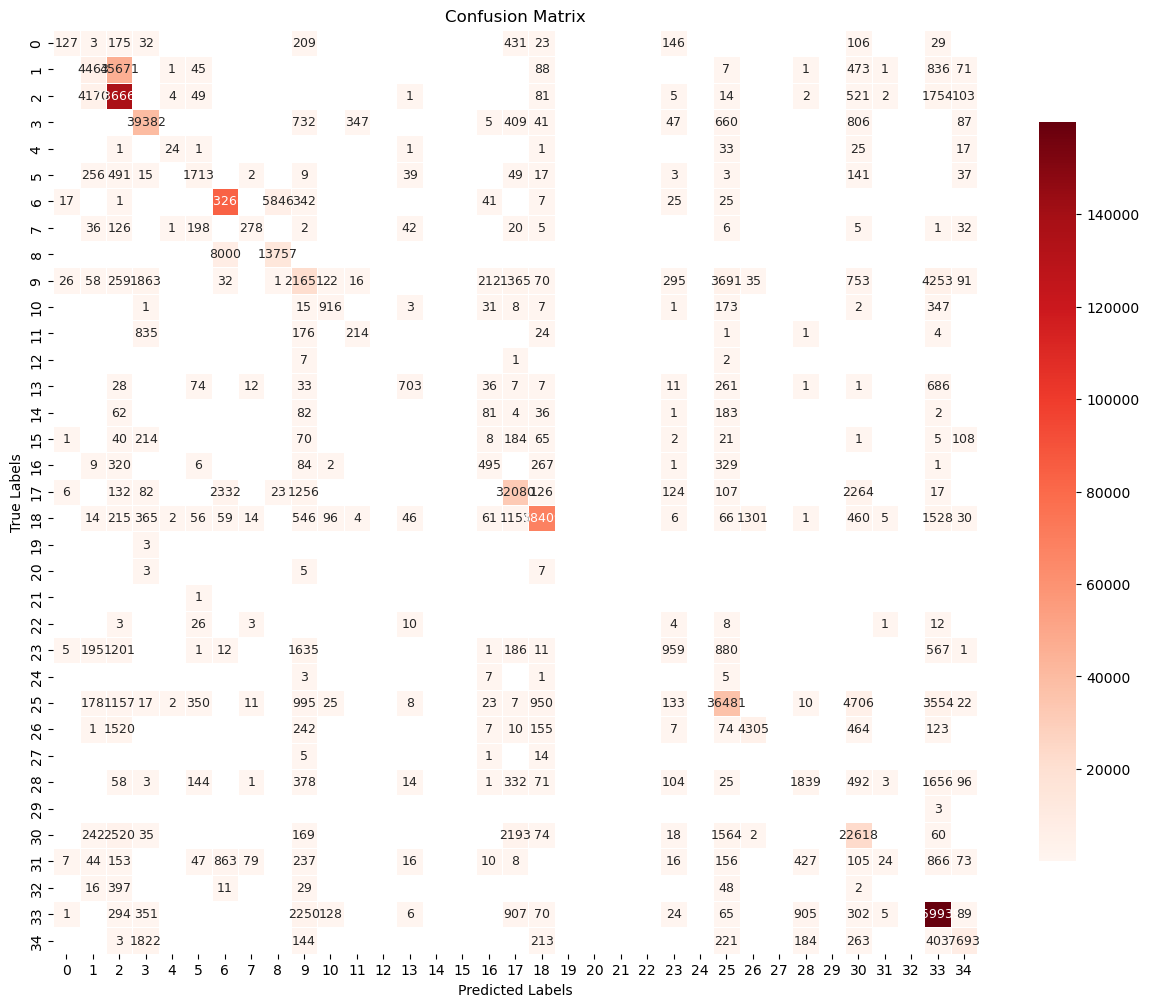

<Figure size 640x480 with 0 Axes>

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

mask = cm == 0
# Display the confusion matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=.5, square=True, annot_kws={"size": 9}, mask = mask,cbar_kws={"shrink": 0.8})
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2, square=False, annot_kws={"size": 10}, cbar_kws={"shrink": 0.6},mask =mask)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png')